<a href="https://colab.research.google.com/github/AbdullahAlTalaq/About-Me/blob/main/Classification(Done)DeepLearningAssiegment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Abdullah Mohammed Al Talaq
#2200001965
# ASSIGNMENT 1: Iris Data Classification (Using TensorFlow)



Note: I used chatgpt & stackoverflow & https://www.kaggle.com/code/kamrankausar/iris-dataset-ml-and-deep-learning-from-scratch

I used TensorFlow through Keras

In [ ]:
import sys
import tensorflow as tf
print (sys.version)
print(tf.__version__)

3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
2.14.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df =pd.read_csv('/content/iris.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sepal_l  150 non-null    float64
 1   sepal_w  150 non-null    float64
 2   petal_l  150 non-null    float64
 3   petal_w  150 non-null    float64
 4   species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.head(10)

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [ ]:
df.isnull().sum()

sepal_l    0
sepal_w    0
petal_l    0
petal_w    0
species    0
dtype: int64

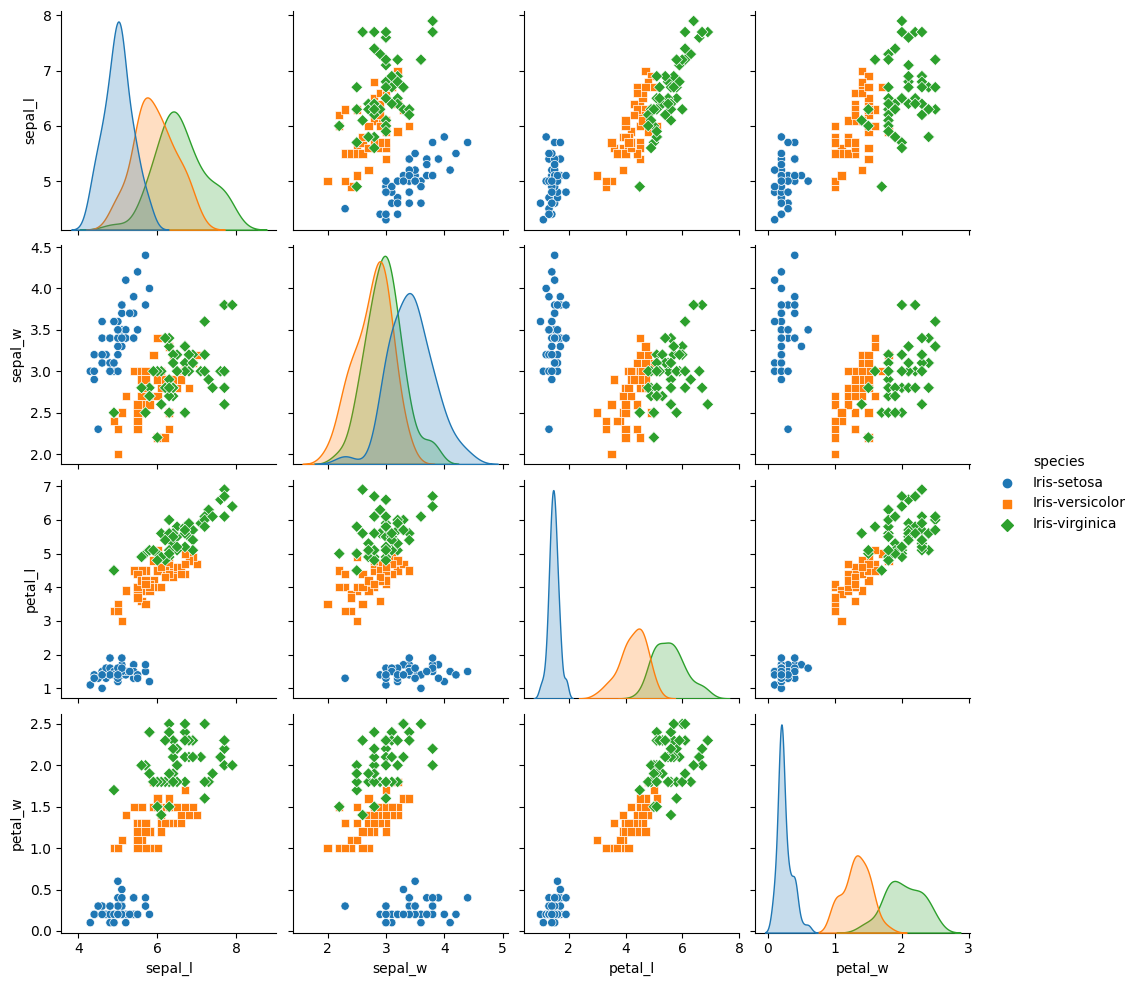

In [ ]:
sns.pairplot(df, hue="species", markers=["o", "s", "D"])
plt.show()

<ipython-input-15-ef9bc82b0105>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


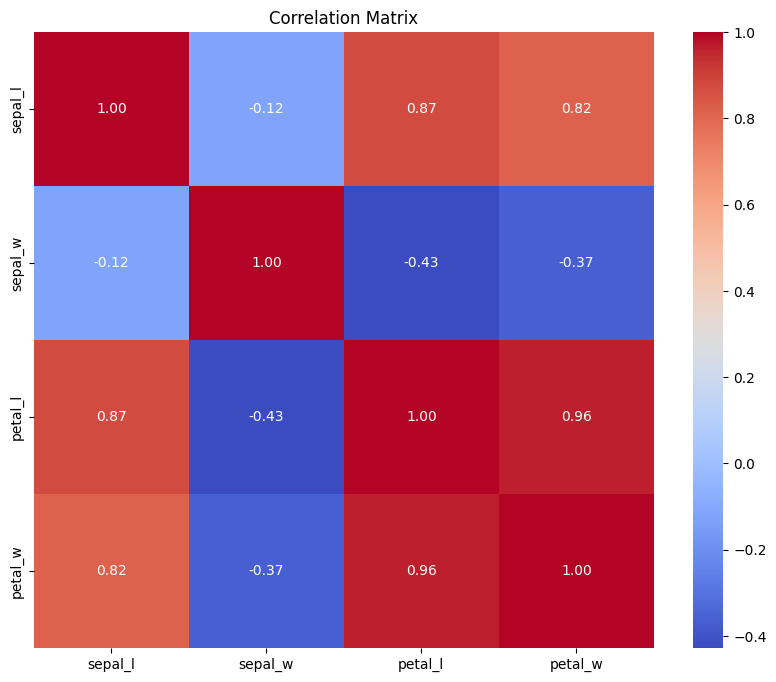

In [ ]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



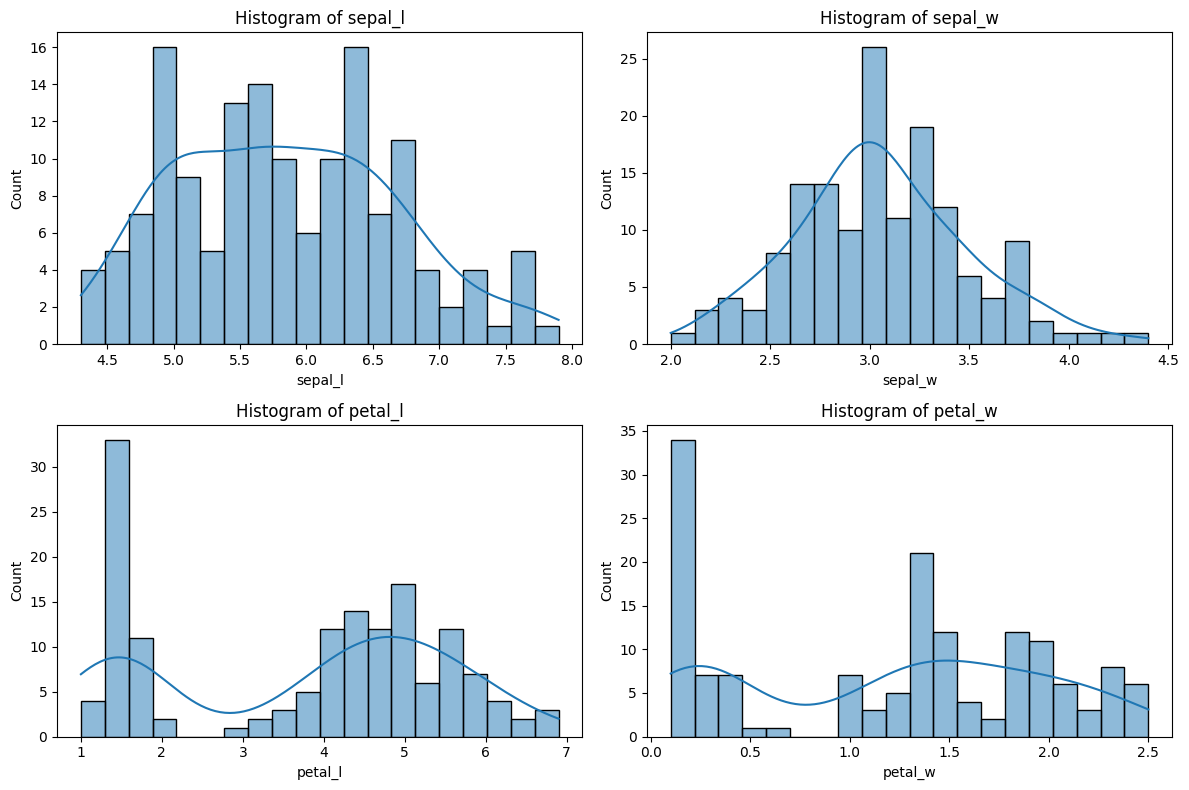

In [ ]:
#chatgpt
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f"Histogram of {column}")
plt.tight_layout()
plt.show()

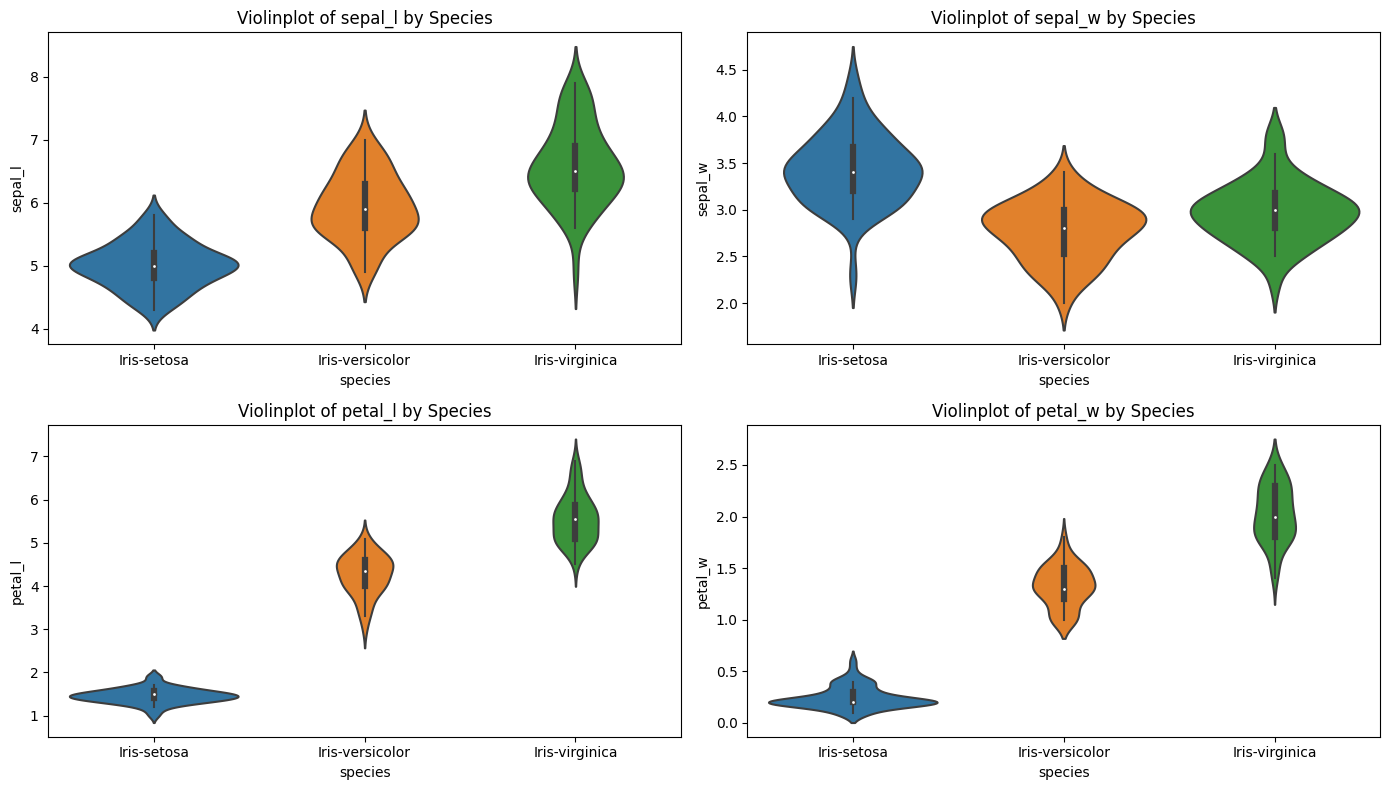

In [ ]:
#chatgpt
plt.figure(figsize=(14, 8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x="species", y=column, data=df)
    plt.title(f"Violinplot of {column} by Species")
plt.tight_layout()
plt.show()

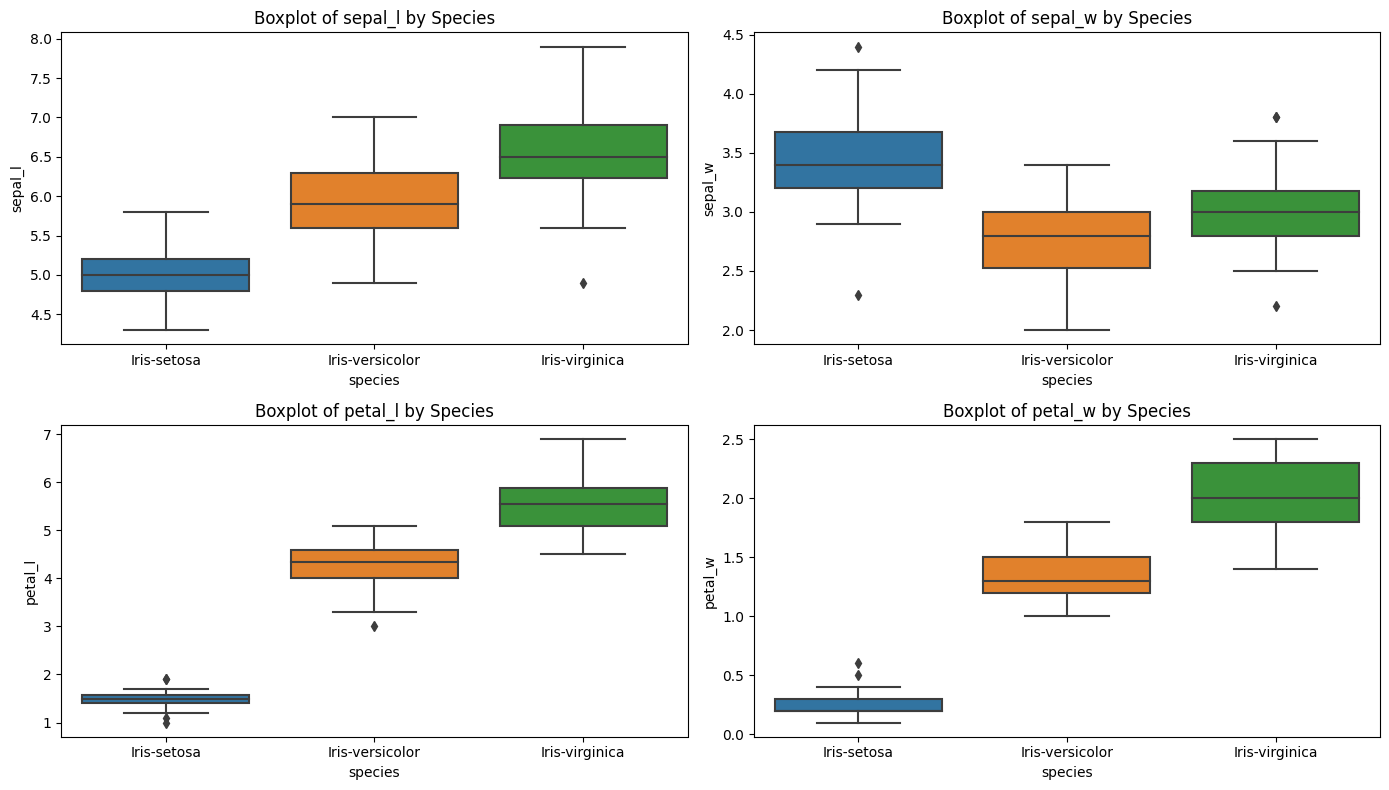

In [ ]:
#chatgpt
plt.figure(figsize=(14, 8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x="species", y=column, data=df)
    plt.title(f"Boxplot of {column} by Species")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn import preprocessing

# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).

In [ ]:
le = preprocessing.LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [ ]:
df.head()

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [ ]:
df.describe(include = 'all')

,sepal_l,sepal_w,petal_l,petal_w,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
X = df.drop(['species'], axis=1)
y = df["species"].values.reshape(-1,1)



# One-Hot Encode using Keras

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

# One-Hot Encode using Keras
y_one_hot = to_categorical(encoded_Y)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


#Deep Learning
I.	Select an appropriate architecture
two hidden layers
II.	Choose appropriate activation functions
Relu and softmax

i used softmax becasue the feature i want to predict is object and i convert it by one hot encode

III.	Implement the model correctly
i used tensorflow throuh keras

IV.	Test the model with sample data

I test the model and got accurcy 100% and i used knn and rf machine algorthims

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[monitor], verbose=2, epochs=200)


Epoch 1/200
4/4 - 1s - loss: 2.0821 - accuracy: 0.3333 - val_loss: 2.0763 - val_accuracy: 0.3333 - 1s/epoch - 354ms/step
Epoch 2/200
4/4 - 0s - loss: 1.9869 - accuracy: 0.3333 - val_loss: 1.9783 - val_accuracy: 0.3333 - 73ms/epoch - 18ms/step
Epoch 3/200
4/4 - 0s - loss: 1.8952 - accuracy: 0.3333 - val_loss: 1.8858 - val_accuracy: 0.3333 - 85ms/epoch - 21ms/step
Epoch 4/200
4/4 - 0s - loss: 1.8096 - accuracy: 0.3333 - val_loss: 1.8008 - val_accuracy: 0.3333 - 64ms/epoch - 16ms/step
Epoch 5/200
4/4 - 0s - loss: 1.7285 - accuracy: 0.3333 - val_loss: 1.7201 - val_accuracy: 0.3333 - 87ms/epoch - 22ms/step
Epoch 6/200
4/4 - 0s - loss: 1.6473 - accuracy: 0.3333 - val_loss: 1.6428 - val_accuracy: 0.3333 - 78ms/epoch - 19ms/step
Epoch 7/200
4/4 - 0s - loss: 1.5756 - accuracy: 0.3333 - val_loss: 1.5683 - val_accuracy: 0.3333 - 63ms/epoch - 16ms/step
Epoch 8/200
4/4 - 0s - loss: 1.5090 - accuracy: 0.3333 - val_loss: 1.4971 - val_accuracy: 0.3333 - 78ms/epoch - 19ms/step
Epoch 9/200
4/4 - 0s - lo

In [ ]:
from sklearn import metrics
import tensorflow as tf
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_compare = np.argmax(y_test,axis=1)
score = metrics.accuracy_score(y_compare, pred)
accuracy_percentage = score * 100
print("Accuracy score: {:.2f}%".format(accuracy_percentage))

1/1 [==============================] - 0s 85ms/step
Accuracy score: 100.00%


#Test

In [ ]:
sample_data = {
    'sepal_l': [5.0, 6.2, 4.7],
    'sepal_w': [3.5, 2.9, 3.2],
    'petal_l': [1.4, 4.3, 1.6],
    'petal_w': [0.2, 1.3, 0.5]
}

class_mapping = {
    0: 'Iris-setosa',
    1: 'Iris-versicolor',
    2: 'Iris-virginica'
}

X_new = pd.DataFrame(sample_data)

In [ ]:

predictions = model.predict(X_new)
predicted_classes = np.argmax(predictions, axis=1)


predicted_labels = [class_mapping[i] for i in predicted_classes]

# Display the predicted classes
print("Predicted Classes:")
print(predicted_labels)

1/1 [==============================] - 0s 39ms/step
Predicted Classes:
['Iris-setosa', 'Iris-versicolor', 'Iris-setosa']


In [ ]:
_report = classification_report(y_compare, pred, target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
print("Classification Report:")
print(report)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.67      0.80         9
 Iris-virginica       0.79      1.00      0.88        11

       accuracy                           0.90        30
      macro avg       0.93      0.89      0.89        30
   weighted avg       0.92      0.90      0.90        30



#k-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

accuracy = accuracy_score(y_test, knn_predictions)*100

print("KNN Accuracy:", accuracy)

KNN Accuracy: 100.0


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, knn_predictions)

print("Classification Report for KNN:")
print(report)

Classification Report for KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30
 samples avg       1.00      1.00      1.00        30



#Random Forest (RF)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, random_state=42)


RF.fit(X_train, y_train)


rf_predictions = RF.predict(X_test)


accuracy = accuracy_score(y_test, rf_predictions)*100
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 100.0


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, rf_predictions)

print("Classification Report for RF:")
print(report)

Classification Report for RF:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30
 samples avg       1.00      1.00      1.00        30

